<a href="https://colab.research.google.com/github/Bertinus/causal_gene_embedding/blob/master/DAG_Generator_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Script to generate random DAGs

*Here are some conditions that are to be satisfied to generate DAG* 

**Note: Have not implemented these conditions for now** 


*   Try ranking the nodes and draw edges from lower ranked nodes to higher ranked ones

                  Or

*   Have an adjacency matrix representation of the edges of our graph, then if the matrix is upper triangular, it's a DAG by necessity

                  Or

*   Generate a random directed graph, and then do a depth-first search for cycles. When you find a cycle, break it by deleting an edge



****************************Nodes****************************************
0
1
2
3
4
5
6
7
8
9
10
11

****************************Connections****************************************
0->6
0->7
1->6
1->7
1->8
2->6
2->8
3->6
3->8
4->7
4->8
5->7
0->9
1->9
5->9
6->9
7->9
0->11
2->11
4->10
4->11
6->10
7->10
7->11
8->10
8->11
9->10
9->11
****************************AdjacencyMatrix****************************************
[[0 0 0 0 0 0 1 1 0 1 0 1]
 [0 0 0 0 0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 1]
 [0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 1 1]
 [0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
****************************DirectedAcyclicGraph****************************************


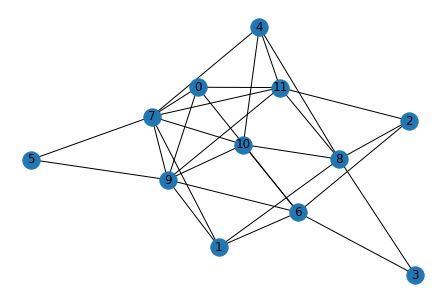

In [46]:
import random
import numpy as np
import networkx as nx


class Graph:
    nodes = []
    edges = []
    removed_edges = []
      
    #function to remove an edge if required
    def remove_edge(self, x, y):
        e = (x,y)
        try:
            self.edges.remove(e)
            # print("Removed edge %s" % str(e))
            self.removed_edges.append(e)
        except:
            return

    def Nodes(self):
        return self.nodes

# Sample data
def __init__(self):
    self.nodes = []
    self.edges = []


def build_latent_dag():
    MIN_NUM_OF_LATENT_VARIABLES = 1    # Nodes/Latent variables: How wide the DAG should be
    MAX_NUM_OF_LATENT_VARIABLES = 5
    MIN_DEPTH = 3   # DEPTH: How deep the DAG should be
    MAX_DEPTH = 5
    EDGE_PROBABILITY = 0.5 # Chance of having an Edge
    nodes = 0

    DEPTH = MIN_DEPTH + random.randint(0,MAX_DEPTH - MIN_DEPTH + 1)

    adjacency = []
    
    #For each level, radomly assign nodes and edges
    for i in range(DEPTH):
        # New nodes of 'higher' rank than all nodes generated till now
        new_nodes = MIN_NUM_OF_LATENT_VARIABLES + random.randint(0,MAX_NUM_OF_LATENT_VARIABLES - MIN_NUM_OF_LATENT_VARIABLES +1)

        # Edges from old nodes ('nodes') to new ones ('new_nodes')
        for j in range(nodes):
            for k in range(new_nodes):
                #random check for probability of having an edge b/w the two nodes
                if random.random() < EDGE_PROBABILITY:    
                    adjacency.append((j, k+nodes))

        nodes += new_nodes

    # Compute graph
    G = Graph()
    
    # Append nodes
    for i in range(nodes):
        G.nodes.append(i)
        
    # Append adjacencies
    for i in range(len(adjacency)):
        G.edges.append(adjacency[i])

    N = G.Nodes()

    # Print nodes, edges, adjacency matrix and generated DAG
    a = [[0 for L2 in range(nodes)] for L1 in range(nodes)]
    
    print ('****************************Nodes****************************************')
    for i in range(nodes):
        print(i)
    print()
    
    print ('****************************Connections****************************************')
    for value in G.edges:
        print(str(value[0]) + '->' + str(value[1]))
        a[value[0]][value[1]] = 1
        
    print ('****************************AdjacencyMatrix****************************************')    
    print (np.matrix(a))
    
    print ('****************************DirectedAcyclicGraph****************************************')
    G = nx.from_numpy_matrix(np.array(a)) 
    #nx.DiGraph(G, directed=True)
    nx.draw(G, arrows=True, with_labels=True)
    
    
    
        
build_latent_dag()

## Just a sample to see how to generate weighted directed graphs with networkx and matplotlib

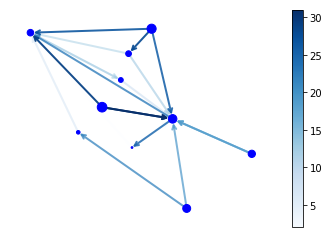

In [29]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

**************************************************************************************

************************************************************************************